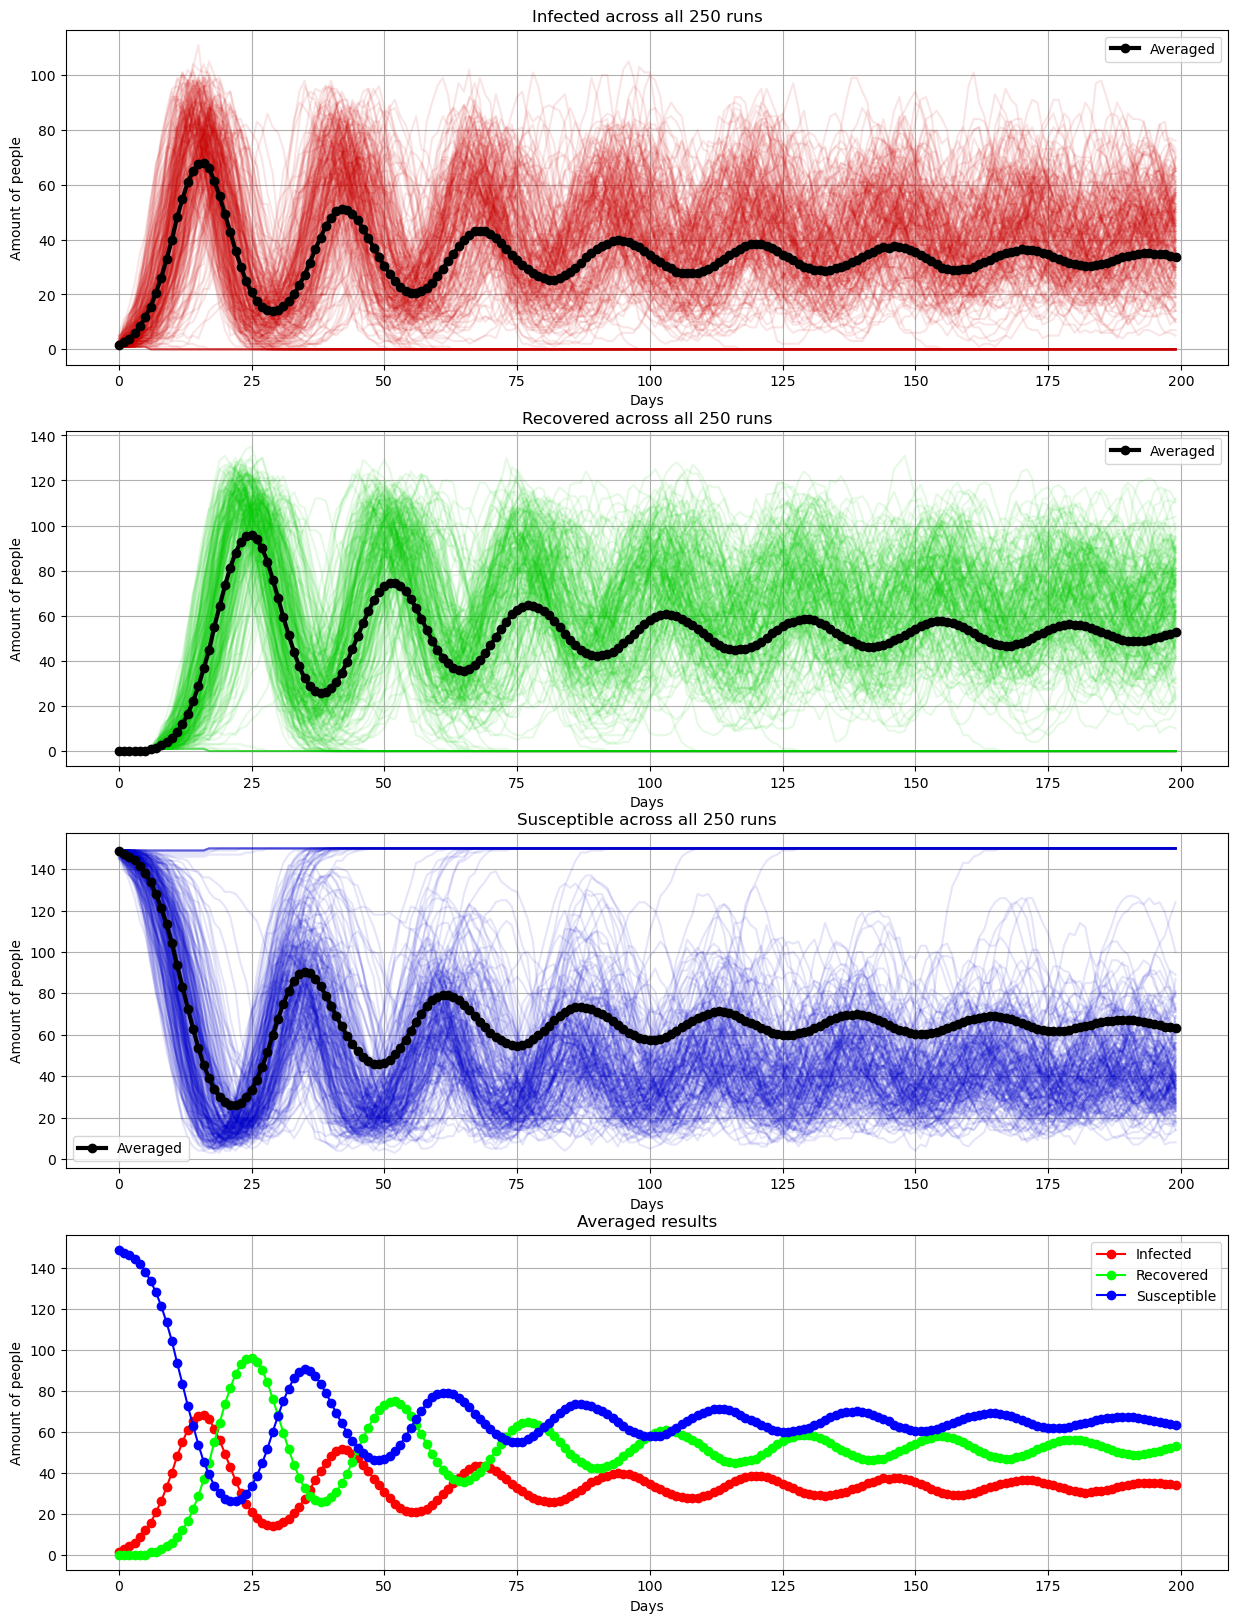

In [6]:
import matplotlib.pyplot as plt
import random
import networkx as nx
import time

plt.rcParams["figure.figsize"] = (15, 20)

Rewiring_Prob = 0.3
Nodes = 150
Nearest_Neighbors = 6
simulations_to_run = 250

simulation_time = 200
recovered_immunity_time = 10
infected_lasting_time = 5
infection_coefficient = 0.2

x_axis_values = [i for i in range(simulation_time)]

fig, ax = plt.subplots(4, 1)
infected_graph, recovered_graph, susceptible_graph, overall_graph = ax

stats = {"Infected" : [0]*simulation_time, "Recovered" : [0]*simulation_time, "Susceptible" : [0]*simulation_time}

for simulation in range(simulations_to_run):
    random.seed = 250
    graph = nx.watts_strogatz_graph(Nodes, Nearest_Neighbors, Rewiring_Prob)

    #make a dictionary of the graph
    network_dict = {node: list(graph.neighbors(node)) for node in graph.nodes}

    # Assign node attributes
    patient_zero_ind = random.randint(0, Nodes-1)
    nx.set_node_attributes(graph, {1: "Infected", 2: "Susceptible", 3: "Recovered"}, "status")
    for node in graph.nodes():
        graph.nodes[node]["status"] = "Susceptible"
        graph.nodes[node]["time_since_infected"] = -1
        graph.nodes[node]["time_since_recovered"] = -1
    graph.nodes[patient_zero_ind]['status'] = 'Infected'
    graph.nodes[patient_zero_ind]["time_since_infected"] = 0
    graph.nodes[patient_zero_ind]["time_since_recovered"] = -1


    # Extract attributes into a dictionary
    node_status_dict = nx.get_node_attributes(graph, "status")
    # Output: {1: 'Infected', 2: 'Susceptible', 3: 'Recovered'}

    # Assign random edge strengths (weights) between 0.1 and 1.0
    for u, v in graph.edges():
        graph[u][v]['weight'] = round(random.uniform(0.01, 1.0), 2)

    # Convert to a dictionary with edge strengths
    edge_strengths = {(u, v): graph[u][v]['weight'] for u, v in graph.edges()}

    random.seed = round(time.time()*1000) # set the seed to a pseudo-random value
    this_simulation_stats = {"Infected" : [0]*simulation_time, "Recovered" : [0]*simulation_time, "Susceptible" : [0]*simulation_time}
    for t in range(simulation_time): #simulation time
        for node in graph.nodes(): #all nodes
            stats[graph.nodes[node]["status"]][t] += 1
            this_simulation_stats[graph.nodes[node]["status"]][t] += 1
            if graph.nodes[node]["status"] == 'Infected': #check infected

                for neighbor in list(graph.neighbors(node)): #infect
                    infect_chance = random.random()
                    if infection_coefficient * graph[neighbor][node]['weight'] >= infect_chance and graph.nodes[neighbor]["status"] == "Susceptible":
                        graph.nodes[neighbor]['status'] = 'Infected'
                        graph.nodes[neighbor]["time_since_infected"] == 0

                # check if should be recovered
                graph.nodes[node]["time_since_infected"] += 1
                if graph.nodes[node]["time_since_infected"] > infected_lasting_time:
                    graph.nodes[node]["status"] = 'Recovered'
                    graph.nodes[node]["time_since_infected"] = -1
                    graph.nodes[node]["time_since_recovered"] = 0
                
            elif graph.nodes[node]["status"] == "Recovered":
                graph.nodes[node]["time_since_recovered"] += 1
                if graph.nodes[node]["time_since_recovered"] > recovered_immunity_time:
                    graph.nodes[node]["status"] = 'Susceptible'
                    graph.nodes[node]["time_since_recovered"] = -1
    infected_graph.plot(x_axis_values, this_simulation_stats["Infected"], "-", color="#cc0000", alpha=0.1)
    recovered_graph.plot(x_axis_values, this_simulation_stats["Recovered"], "-", color="#00cc00", alpha=0.1)
    susceptible_graph.plot(x_axis_values, this_simulation_stats["Susceptible"], "-", color="#0000cc", alpha=0.1)

for stat in stats.values():
    for i in range(simulation_time):
        stat[i] = stat[i]/simulations_to_run
        

overall_graph.plot(x_axis_values, stats["Infected"], "-o", label="Infected", color="red")
infected_graph.plot(x_axis_values, stats["Infected"], "-o", label="Averaged", color="black", lw=3)
overall_graph.plot(x_axis_values, stats["Recovered"], "-o", label="Recovered", color="lime")
recovered_graph.plot(x_axis_values, stats["Recovered"], "-o", label="Averaged", color="black", lw=3)
overall_graph.plot(x_axis_values, stats["Susceptible"], "-o", label="Susceptible", color="blue")
susceptible_graph.plot(x_axis_values, stats["Susceptible"], "-o", label="Averaged", color="black", lw=3)

infected_graph.grid()
recovered_graph.grid()
susceptible_graph.grid()
overall_graph.grid()

infected_graph.legend()
recovered_graph.legend()
susceptible_graph.legend()
overall_graph.legend()

infected_graph.set_xlabel("Days")
recovered_graph.set_xlabel("Days")
susceptible_graph.set_xlabel("Days")
overall_graph.set_xlabel("Days")

infected_graph.set_ylabel("Amount of people")
recovered_graph.set_ylabel("Amount of people")
susceptible_graph.set_ylabel("Amount of people")
overall_graph.set_ylabel("Amount of people")

infected_graph.set_title(f"Infected across all {simulations_to_run} runs")
recovered_graph.set_title(f"Recovered across all {simulations_to_run} runs")
susceptible_graph.set_title(f"Susceptible across all {simulations_to_run} runs")
overall_graph.set_title("Averaged results")
plt.show()